In [1]:
# !pip freeze > requirements.txt
# !mv requirements.txt /content/drive/MyDrive/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir

from glob import glob
from sklearn import preprocessing

In [6]:
df = pd.read_pickle('df.plk')
df.shape

(1050, 16)

#### On souhaite associer à chaque image une catégorie cible

In [7]:
df_to_merge = df[['target','image']].copy()
df_to_merge.head(), df_to_merge.shape

(            target                                 image
 0  Home Furnishing  55b85ea15a1536d46b7190ad6fff8ce7.jpg
 1        Baby Care  7b72c92c2f6c40268628ec5f14c6d590.jpg
 2        Baby Care  64d5d4a258243731dc7bbb1eef49ad74.jpg
 3  Home Furnishing  d4684dcdc759dd9cdf41504698d737d8.jpg
 4  Home Furnishing  6325b6870c54cd47be6ebfbffa620ec7.jpg,
 (1050, 2))

#### On créer un df avec le chemin vers les images

In [8]:
from google.colab import drive
drive.mount('/content/drive')

# /content/drive/MyDrive/Données/Flipkart/Images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Chemin
path = "/content/drive/MyDrive/Données/Flipkart/Images"

df_to_merge['image_path'] = path + '/' + df_to_merge['image']
df_to_merge.head()

,target,image,image_path
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...


In [10]:
# On vérifie si les photos sont bien les mêmes
if (set(df['image'].unique()) == set(df_to_merge['image'].unique())) == True:
    print('Les images des deux dataframes correspondent')
else : print('not')

Les images des deux dataframes correspondent


In [12]:
data = df_to_merge.copy()
data

,target,image,image_path
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
...,...,...,...
1045,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
1046,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
1047,Baby Care,5912e037d12774bb73a2048f35a00009.jpg,/content/drive/MyDrive/Données/Flipkart/Image...
1048,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,/content/drive/MyDrive/Données/Flipkart/Image...


In [13]:
# Jointure pour récupérer la colonne target
# data = df_to_merge.merge(data, on = 'image')

# Encodage pour modélisation
le = preprocessing.LabelEncoder()
le.fit(data["target"])
data["target_encode"] = le.transform(data["target"])

# Visualisation du df
data.head()

,target,image,image_path,target_encode
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...,4
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,/content/drive/MyDrive/Données/Flipkart/Image...,0
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,/content/drive/MyDrive/Données/Flipkart/Image...,0
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,/content/drive/MyDrive/Données/Flipkart/Image...,4
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,/content/drive/MyDrive/Données/Flipkart/Image...,4


In [14]:
target_list = data.target.unique().tolist()
target_list

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

Home Furnishing


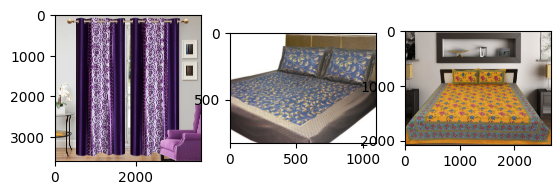

Baby Care


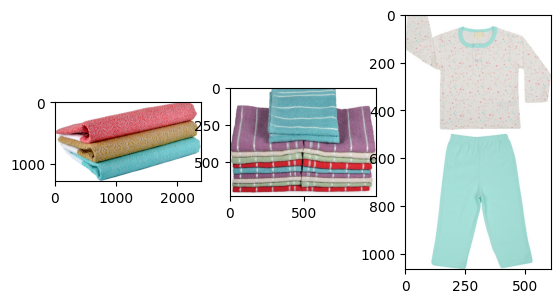

Watches


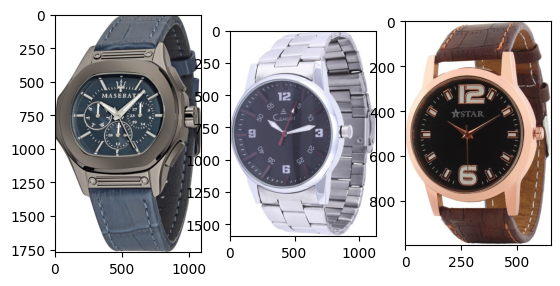

Home Decor & Festive Needs


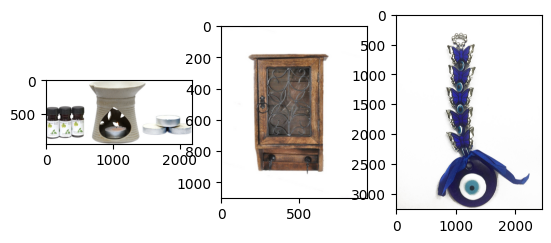

Kitchen & Dining


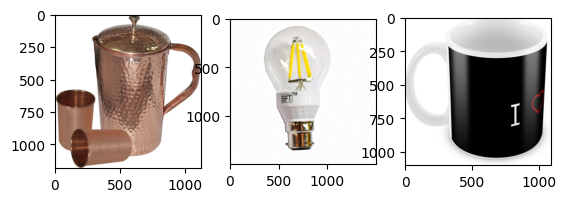

Beauty and Personal Care


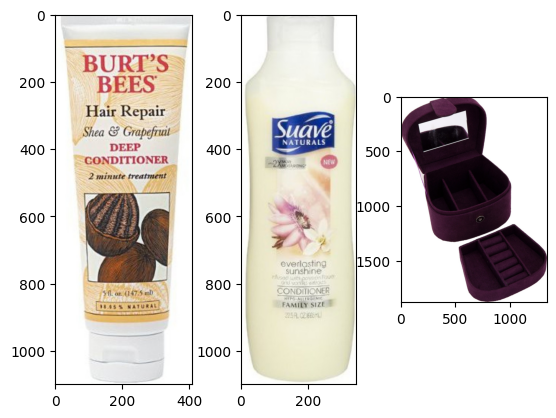

Computers


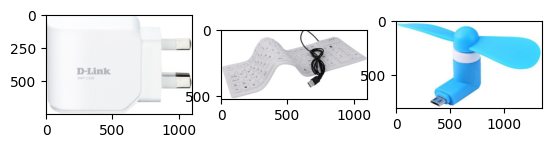

In [15]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data["image_path"][i] for i in range(len(data)) if data["target"][i]==name]
    return list_image_name


list_Home_Furnishing=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Home Furnishing"]
list_Baby_Care=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Baby Care"]
list_Watches=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Watches"]
list_Home_Decor=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Home Decor & Festive Needs"]
list_Kitchen_Dining=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Kitchen & Dining"]
list_Beauty=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Beauty and Personal Care"]
list_Computers=[data["image_path"][i] for i in range(len(data)) if data["target"][i]=="Computers"]


for name in target_list :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(name)[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Etape 1 : étude de faisabilité


#### Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
2. un algorithme de type SIFT / ORB / SURF

# SIFT

## Détermination et affichage des descripteurs SIFT

* L'image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

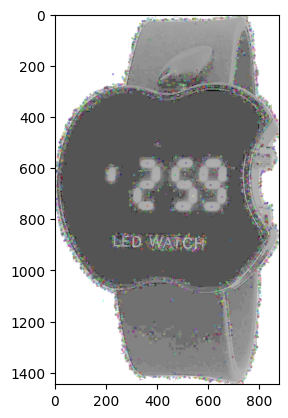

Descripteurs :  (3719, 128)

[[  2.   5.   0. ... 128.   7.   1.]
 [ 31.  16.  25. ...   0.   0.   0.]
 [116.  13.   3. ...   5.   2.   0.]
 ...
 [ 58.  55.  49. ...  52.   0.   0.]
 [  0.   0.   0. ...  19.  85.  43.]
 [  2.   0.   0. ...   0.  38.  80.]]


In [16]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread("montre.jpg",cv2.IMREAD_GRAYSCALE) #convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [19]:
list_photos = data['image_path'].to_list()

In [20]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(200)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype = 'object')
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (210415, 128)
temps de traitement SIFT descriptor :           487.88 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [21]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  459
Création de 459 clusters de descripteurs ...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             6.38 secondes


## Création des features des images
* Pour chaque image :
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [22]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.24 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [23]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 459)
Dimensions dataset après réduction PCA :  (1050, 372)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [24]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30,
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["target"]
print(df_tsne.shape)


(1050, 3)


Analyse visuelle : affichage T-SNE selon catégories d'images
Les catégories "cloudy" et "rain" sont partiellement séparées

<ipython-input-25-94deda33631c>:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


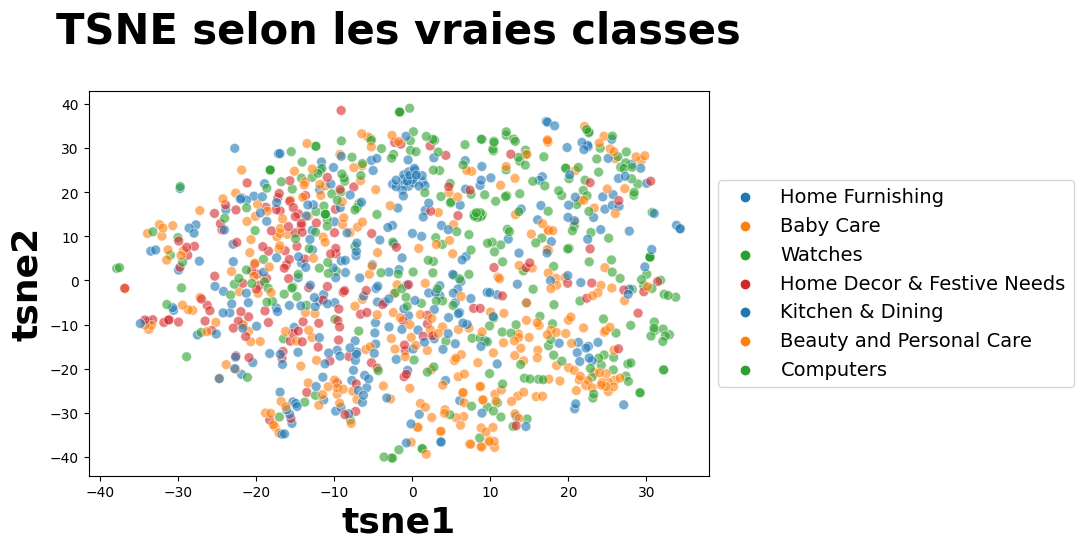

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()




## Analyse mesures : similarité entre catégories et clusters


###  Création de clusters à partir du T-SNE

In [26]:
nb_target = data.target.nunique()
nb_target

7

In [28]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=nb_target, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.15 reste faible

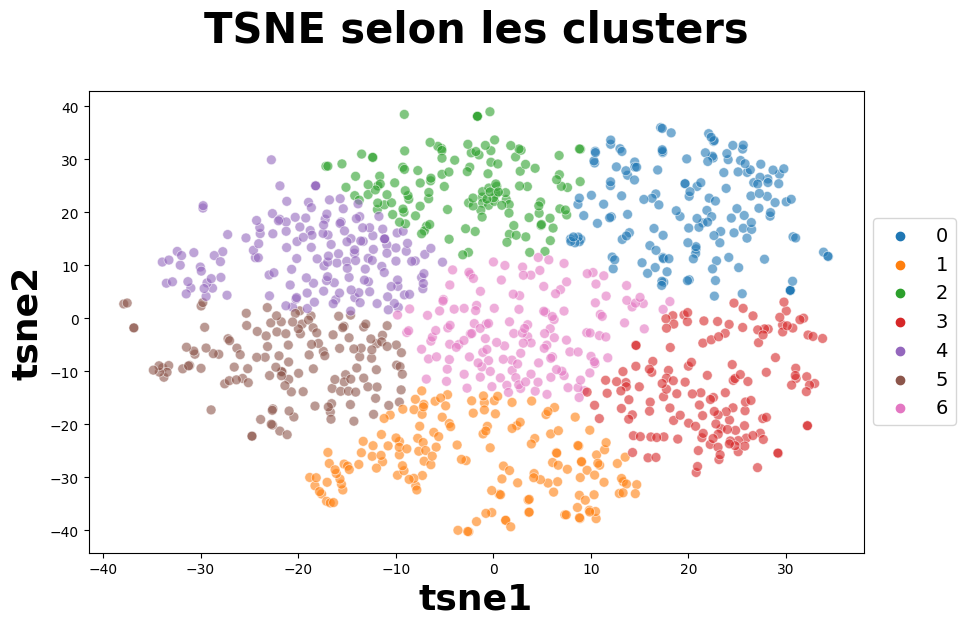

ARI :  0.04621774462951033


In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

labels = data["target"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [30]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    158
1    163
2    136
3    147
4    159
5    139
6    148
Name: class, dtype: int64

In [42]:
conf_mat = metrics.confusion_matrix(data['target_encode'], cls.labels_)
print(conf_mat)

[[16 33 17 19 25 19 21]
 [16 42  7 44 16 12 13]
 [56  6 33 17 17 13  8]
 [ 5 16 12  8 45 45 19]
 [21 36 11 10 15 31 26]
 [24 11 38 10 26 10 31]
 [20 19 18 39 15  9 30]]


In [46]:
y_pred = cls.labels_
y_true = data['target_encode']
target_names = data['target'].unique()

print(metrics.classification_report(y_true, y_pred, target_names = target_names))

                            precision    recall  f1-score   support

           Home Furnishing       0.10      0.11      0.10       150
                 Baby Care       0.26      0.28      0.27       150
                   Watches       0.24      0.22      0.23       150
Home Decor & Festive Needs       0.05      0.05      0.05       150
          Kitchen & Dining       0.09      0.10      0.10       150
  Beauty and Personal Care       0.07      0.07      0.07       150
                 Computers       0.20      0.20      0.20       150

                  accuracy                           0.15      1050
                 macro avg       0.15      0.15      0.15      1050
              weighted avg       0.15      0.15      0.15      1050



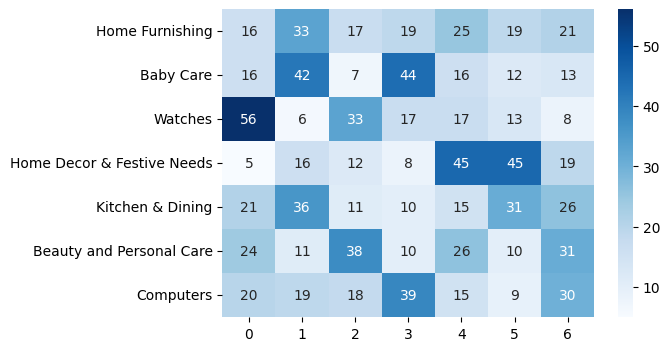

In [50]:
df_cm = pd.DataFrame(conf_mat, index = [target for target in target_names],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()